# Capstone project: predict Rossmann's store sales

## Manuel Freude, May 2018

## Cleanup code

Report and library sheets will be provided separately

In [37]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

/Users/manuelfreude/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
# store overview (1)

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [39]:
# store overview (2)

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [40]:
# store overview (3)

store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [41]:
# test overview (1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [42]:
# test overview (2)

test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [43]:
# test overview (3)

test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [44]:
# train overview (1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [45]:
# train overview (2)

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [46]:
# train overview (3)

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


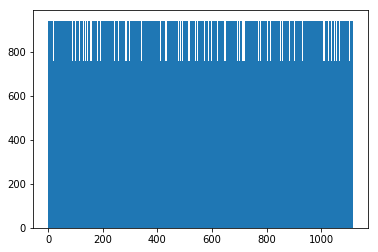

In [47]:
# checking if all store IDs are more or less equally spread, aka they occur equally often

plt.pyplot.hist(train['Store'], bins=1115);

In [48]:
# merging train and store data before we cleanup datatypes and form regression-ready variables

data = pd.merge(train, store, how='outer', on='Store')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [49]:
# checking on key items (1)

data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [50]:
# checking on key items (2)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

Here I see following things I need to fix:
- We have day of week, but not day of month, month and year captured, need to do that, e.g. for seasonalities
- State holiday is an object with four forms: a (public), b (Easter), c(Christmas) and 0 (none). These need to be translated into dummy variables
- Story type also is an object for four models a-d. These need to be translated into dummy variables
- Assortment is an object with three types: a (basic), b (extra) and c (extended). Again transition to dummies as we're not sure of linearity regarding "extra" and "extended"
- Promo interval is also an object we can't use for regression, need to have a closer look to figure out how to translate into numbers

In [51]:
# closer look at state holiday

data['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Here we have two zeros, need to merge that.

In [52]:
# closer look at store type

data['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [53]:
# closer look at store type

data['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [54]:
# closer look at promo interval

data['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

This is cool, Rossmann has three pre-defined promo intervals, which makes it easily transferrable into a dummy variable.

Looks now like we're going to have a lot of dummy variables. I will run the models as planned with all data input.

With these many influencers, it seems obvious that this is better conducted via statistics than via the well-established Excel sheets, 10+ potential influencing variables are hard to digest without proper statistical analysis.

In [55]:
# break up data into day of month, month and year. Then generate dummies for months and years, day of week is okay

# we keep the Date column as we need this for splitting into train, test and true data considering the time

# source: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python

data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year

month = pd.get_dummies(data['Month'])
year = pd.get_dummies(data['Year'])

month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
# checking some numbers

data['Year'].value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

In [57]:
# checking some numbers

year.head()

,2013,2014,2015
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [58]:
# get dummies for competition month and year

comp_month = pd.get_dummies(data['CompetitionOpenSinceMonth'])
comp_year = pd.get_dummies(data['CompetitionOpenSinceYear'])

comp_year.head()

,1900.0,1961.0,1990.0,1994.0,1995.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# get_dummies for state holiday incl. cleanup of "double zeros" by dropping first 0 column

holiday = pd.get_dummies(data['StateHoliday'], drop_first=True)
holiday.head()

,0,a,b,c
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [60]:
# get_dummies for store type

store_type = pd.get_dummies(data['StoreType'])
store_type.head()

,a,b,c,d
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [61]:
# get_dummies for assortment

assortment = pd.get_dummies(data['Assortment'])
assortment.head()

,a,b,c
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [62]:
# get_dummies for promo interval

promo_interval = pd.get_dummies(data['PromoInterval'])
promo_interval.head()

,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [63]:
# add dummies to our dataset and rename column heads

data = pd.concat([data, holiday], axis=1)
data.rename(columns={'0': 'H_None'}, inplace=True)
data.rename(columns={'a': 'H_Public'}, inplace=True)
data.rename(columns={'b': 'H_Easter'}, inplace=True)
data.rename(columns={'c': 'H_X-Mas'}, inplace=True)

data = pd.concat([data, store_type], axis=1)
data.rename(columns={'a': 'Type_A'}, inplace=True)
data.rename(columns={'b': 'Type_B'}, inplace=True)
data.rename(columns={'c': 'Type_C'}, inplace=True)
data.rename(columns={'d': 'Type_D'}, inplace=True)

data = pd.concat([data, assortment], axis=1)
data.rename(columns={'a': 'Assort_Basic'}, inplace=True)
data.rename(columns={'b': 'Assort_Extra'}, inplace=True)
data.rename(columns={'c': 'Assort_Extended'}, inplace=True)

data = pd.concat([data, month], axis=1)
data.rename(columns={1: 'Jan'}, inplace=True)
data.rename(columns={2: 'Feb'}, inplace=True)
data.rename(columns={3: 'Mar'}, inplace=True)
data.rename(columns={4: 'Apr'}, inplace=True)
data.rename(columns={5: 'May'}, inplace=True)
data.rename(columns={6: 'Jun'}, inplace=True)
data.rename(columns={7: 'Jul'}, inplace=True)
data.rename(columns={8: 'Aug'}, inplace=True)
data.rename(columns={9: 'Sep'}, inplace=True)
data.rename(columns={10: 'Oct'}, inplace=True)
data.rename(columns={11: 'Nov'}, inplace=True)
data.rename(columns={12: 'Dec'}, inplace=True)

data = pd.concat([data, year], axis=1)

data = pd.concat([data, promo_interval], axis=1)
data.rename(columns={'Promo': 'Promo1'}, inplace=True)
data.rename(columns={'Feb,May,Aug,Nov': 'Promo2_Feb,May,Aug,Nov'}, inplace=True)
data.rename(columns={'Jan,Apr,Jul,Oct': 'Promo2_Jan,Apr,Jul,Oct'}, inplace=True)
data.rename(columns={'Mar,Jun,Sept,Dec': 'Promo2_Mar,Jun,Sept,Dec'}, inplace=True)
data.rename(columns={'Day': 'DayOfMonth'}, inplace=True)
data.rename(columns={'Store': 'Store_ID'}, inplace=True)

data.head()

,Store_ID,DayOfWeek,Date,Sales,Customers,Open,Promo1,StateHoliday,SchoolHoliday,StoreType,...,Sep,Oct,Nov,Dec,2013,2014,2015,"Promo2_Feb,May,Aug,Nov","Promo2_Jan,Apr,Jul,Oct","Promo2_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# double checking some numbers (1)

data['H_Public'].sum()

20260

In [65]:
# double checking some numbers (2)

data['Type_D'].sum()

312912

In [66]:
# double checking some numbers (3)

data['Assort_Extra'].sum()

8294

In [67]:
# double checking some numbers (4)

data['Promo2_Feb,May,Aug,Nov'].sum()

118596

In [68]:
# Okay that worked, now looking at the columns to see which ones need format updates and which ones can be removed

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 50 columns):
Store_ID                     1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo1                       1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [69]:
# changing data types

data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].astype(int, errors='ignore', inplace=True)
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].astype(int, errors='ignore', inplace=True)
data['H_None'] = data['H_None'].astype(int, inplace=True)
data['H_Public'] = data['H_Public'].astype(int, inplace=True)
data['H_Easter'] = data['H_Easter'].astype(int, inplace=True)
data['H_X-Mas'] = data['H_X-Mas'].astype(int, inplace=True)
data['Type_A'] = data['Type_A'].astype(int, inplace=True)
data['Type_B'] = data['Type_B'].astype(int, inplace=True)
data['Type_C'] = data['Type_C'].astype(int, inplace=True)
data['Type_D'] = data['Type_D'].astype(int, inplace=True)
data['Assort_Basic'] = data['Assort_Basic'].astype(int, inplace=True)
data['Assort_Extra'] = data['Assort_Extra'].astype(int, inplace=True)
data['Assort_Extended'] = data['Assort_Extended'].astype(int, inplace=True)
data['Promo2_Feb,May,Aug,Nov'] = data['Promo2_Feb,May,Aug,Nov'].astype(int, inplace=True)
data['Promo2_Jan,Apr,Jul,Oct'] = data['Promo2_Jan,Apr,Jul,Oct'].astype(int, inplace=True)
data['Promo2_Mar,Jun,Sept,Dec'] = data['Promo2_Mar,Jun,Sept,Dec'].astype(int, inplace=True)
data['Jan'] = data['Jan'].astype(int, inplace=True)
data['Feb'] = data['Feb'].astype(int, inplace=True)
data['Mar'] = data['Mar'].astype(int, inplace=True)
data['Apr'] = data['Apr'].astype(int, inplace=True)
data['May'] = data['May'].astype(int, inplace=True)
data['Jun'] = data['Jun'].astype(int, inplace=True)
data['Jul'] = data['Jul'].astype(int, inplace=True)
data['Aug'] = data['Aug'].astype(int, inplace=True)
data['Sep'] = data['Sep'].astype(int, inplace=True)
data['Oct'] = data['Oct'].astype(int, inplace=True)
data['Nov'] = data['Nov'].astype(int, inplace=True)
data['Dec'] = data['Dec'].astype(int, inplace=True)
data[2013] = data[2013].astype(int, inplace=True)
data[2014] = data[2014].astype(int, inplace=True)
data[2015] = data[2015].astype(int, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 50 columns):
Store_ID                     1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo1                       1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [70]:
# I'm keeping the competition variables and month/year as is as the year will be interesting, 
# offer a long timeframe and might be both applicable for my type of analysis

# dropping irrelevant columns

data.drop(columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'] , inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 46 columns):
Store_ID                     1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo1                       1017209 non-null int64
SchoolHoliday                1017209 non-null int64
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null float64
DayOfMonth                   1017209 non-null int64
Month                        1017209 non-null int64
Year                         1017209 non-null in

In [71]:
# adding an intercept constant we will need for later regression

data['Intercept'] = 1

In [72]:
# reordering for better look & feel

data = data[['Intercept',
             'Store_ID', 
             'Customers',
             'Sales',
             'Open',
             'H_None',  
             'H_Public', 
             'H_Easter', 
             'H_X-Mas',
             'SchoolHoliday',
             'Type_A',          
             'Type_B',
             'Type_C', 
             'Type_D', 
             'Assort_Basic', 
             'Assort_Extra', 
             'Assort_Extended', 
             'Promo1', 
             'Promo2', 
             'Promo2SinceWeek', 
             'Promo2SinceYear', 
             'Promo2_Feb,May,Aug,Nov', 
             'Promo2_Jan,Apr,Jul,Oct', 
             'Promo2_Mar,Jun,Sept,Dec', 
             'CompetitionDistance',
             'CompetitionOpenSinceMonth', 
             'CompetitionOpenSinceYear',
             'Date',
             'DayOfMonth', 
             'DayOfWeek',
             'Month', 
             'Year',
             2013, 
             2014,
             2015, 
             'Jan', 
             'Feb', 
             'Mar',
             'Apr', 
             'May', 
             'Jun', 
             'Jul',
             'Aug', 
             'Sep', 
             'Oct', 
             'Nov',
             'Dec']]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 47 columns):
Intercept                    1017209 non-null int64
Store_ID                     1017209 non-null int64
Customers                    1017209 non-null int64
Sales                        1017209 non-null int64
Open                         1017209 non-null int64
H_None                       1017209 non-null int64
H_Public                     1017209 non-null int64
H_Easter                     1017209 non-null int64
H_X-Mas                      1017209 non-null int64
SchoolHoliday                1017209 non-null int64
Type_A                       1017209 non-null int64
Type_B                       1017209 non-null int64
Type_C                       1017209 non-null int64
Type_D                       1017209 non-null int64
Assort_Basic                 1017209 non-null int64
Assort_Extra                 1017209 non-null int64
Assort_Extended              1017209 non-null int64
Pro

In [73]:
# save output to csv

data.to_csv('cleaned_dataset.csv')